<a href="https://colab.research.google.com/github/yuki2023-kenkyu/Numerical_Computation_Seminar/blob/main/answer/answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##演習問題④
___

次の微分方程式を無次元化して，Runge-Kutta法で数値計算せよ．

$$
\begin{eqnarray}
  M\frac{dv}{dt} = Mg - \beta v^2 \quad (M = 1.0, g = 9.8, \beta=1.5,v_0=0.10,t_0=0,t_{max}=10)
\end{eqnarray}
$$

>解答例
___

**ステップ１：無次元化を必要とする変数はどれなのか明らかにする．**

　　　　　　$[v], [t]$を無次元化する．

**ステップ２：問題の物理的な意味を考え，基準量の候補を検討する．**

　　　　　　基準量の候補となるものは，[$v$]が終端速度[$V$]，[$t$]はわからないので[$\tau$]とおく．

**ステップ３：運動方程式を変換する．**

$$
\begin{eqnarray}
  V &=& \sqrt{\frac{Mg}{\beta}}\\
  \bar v &=& \frac{v}{V}\\
  \bar t &=& \frac{t}{\tau}\\
\end{eqnarray}
$$
　　　　　　これらを踏まえて，運動方程式を変形すると，
$$
\begin{eqnarray}
  \frac{V}{\tau} \frac{d\bar v}{d\bar t} &=& g-\frac{\beta V^2}{M}\bar v^2
\end{eqnarray}
\tag{ⅰ}
$$

**ステップ４：上記1，2の結果を踏まえて基準量を設定する．**

　　　　　　(ⅰ)式の右辺に$V=\sqrt{\frac{Mg}{\beta}}$を代入すると，

$$
\begin{eqnarray}
  \frac{V}{\tau} \frac{d\bar v}{d\bar t} &=& g-\frac{\beta}{M}\cdot\left(\frac{Mg}{\beta}\right)\bar v^2\\
  &=& g(1-\bar v^2)
\end{eqnarray}
$$

　　　　　　ここで，$\frac{V}{\tau}=g$として，

$$
\begin{eqnarray}
  \therefore \tau = \frac{V}{g} = \sqrt{\frac{M}{\beta g}}
\end{eqnarray}
$$

**ステップ５：方程式全体を無次元変数（と無次元パラメーター）で書かれた形に整理する．**

　　　　　　無次元化された方程式は以下の通り．
$$
\begin{eqnarray}
  \frac{d \bar v}{d\bar t} = 1-\bar v^2
\end{eqnarray}
$$
___

<Figure size 432x288 with 0 Axes>

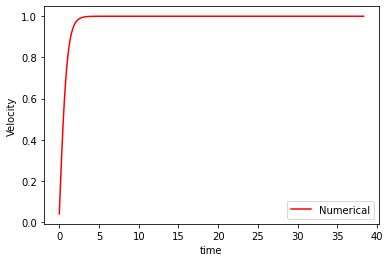

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 無次元化した微分方程式
def f(t, v):
  return 1 - v**2

# 初期条件
M = 1.0
beta = 1.5
g = 9.8
t_0 = 0
v_0 = 0.10
V = (M*g/beta)**0.5
bar_v_0 = v_0/V
tmax = 10
bar_t_0 = 0
bar_t_max = tmax/(M/(beta*g))**0.5

# 刻み幅の設定
m = 2**10
h = (bar_t_max - bar_t_0) /m

# 変域の設定
tpoints = np.arange(bar_t_0, bar_t_max, h)
# 計算結果を保存する配列の用意
vpoints = []

# 初期値の代入
t=bar_t_0
v=bar_v_0
# 数値積分
for t in tpoints:
    # 配列に要素を追加
    vpoints.append(v)
    # ルンゲ・クッタ法のアルゴリズム
    k1 = h * f(t, v)
    k2 = h * f(t+h/2, v+k1/2)
    k3 = h * f(t+h/2, v+k2/2)
    k4 = h * f(t+h, v+k3)
    v += (k1+2*k2+2*k3+k4)/6

# グラフ用の各種設定
fig = plt.figure()
# グラフの背景色の設定
fig, ax = plt.subplots(facecolor = 'white')

ax.plot(tpoints, vpoints, '-', label = 'Numerical', color = 'red')
plt.xlabel('time')
plt.ylabel('Velocity')
plt.legend(loc = 'best')

In [ ]:
V

2.5560386016907755